<a href="https://colab.research.google.com/github/ploutonn/MNIST/blob/main/Copy_of_MNIST_Tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import Libraries

In [4]:
import random
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf
from scipy.ndimage.interpolation import shift

<ipython-input-4-b4ef42466b4e>:6: DeprecationWarning: Please use `shift` from the `scipy.ndimage` namespace, the `scipy.ndimage.interpolation` namespace is deprecated.
  from scipy.ndimage.interpolation import shift


# Setting Environment Seeds

Seeds enable the reproduction of the experiments.

In [ ]:
random.seed(0)
np.random.seed(seed=0)
tf.random.set_seed(seed=0)

# Load MNIST Dataset using Tensorflow

In [3]:
(x_train, y_train), (x_test, y_test ) = tf.keras.datasets.mnist.load_data()
x_train.shape, y_train.shape, x_test.shape, y_test.shape

def shift_image(image, dx, dy):
    shifted_image = shift(image, [dy, dx], cval=0, mode="constant")
    return shifted_image.reshape((1,28,28))
i=0

x_train_new=x_train
y_train_new=y_train

y_train_new=np.insert(y_train_new,60000,y_train)
y_train_new=np.insert(y_train_new,120000,y_train)

x_test_new=x_test
y_test_new=y_test
y_test_new=np.insert(y_test_new,10000,y_test)
y_test_new=np.insert(y_test_new,20000,y_test)
print(
    f'Training Size - Inputs:{x_train_new.shape}, Targets:{y_train_new.shape}'
    f'\nTest Size - Inputs:{x_test_new.shape}, Targets:{y_test_new.shape}'
)
for dx, dy in ((1,1), (-1,-1)):
    for image, label in zip(x_train, y_train):
             x_train_new=np.insert(x_train_new,60000+i,shift_image(image, dx, dy),0)
             i=i+1
             print(f'{i}')
i=0


for dx, dy in ((1,1), (-1,-1)):
    for image, label in zip(x_test, y_test):
             x_test_new=np.insert(x_test_new,10000+i,shift_image(image, dx, dy),0)
             i=i+1
             print(f'{i}')
print(
    f'Training Size - Inputs:{x_train_new.shape}, Targets:{y_train_new.shape}'
    f'\nTest Size - Inputs:{x_test_new.shape}, Targets:{y_test_new.shape}'
)

Streaming output truncated to the last 5000 lines.
15003
15004
15005
15006
15007
15008
15009
15010
15011
15012
15013
15014
15015
15016
15017
15018
15019
15020
15021
15022
15023
15024
15025
15026
15027
15028
15029
15030
15031
15032
15033
15034
15035
15036
15037
15038
15039
15040
15041
15042
15043
15044
15045
15046
15047
15048
15049
15050
15051
15052
15053
15054
15055
15056
15057
15058
15059
15060
15061
15062
15063
15064
15065
15066
15067
15068
15069
15070
15071
15072
15073
15074
15075
15076
15077
15078
15079
15080
15081
15082
15083
15084
15085
15086
15087
15088
15089
15090
15091
15092
15093
15094
15095
15096
15097
15098
15099
15100
15101
15102
15103
15104
15105
15106
15107
15108
15109
15110
15111
15112
15113
15114
15115
15116
15117
15118
15119
15120
15121
15122
15123
15124
15125
15126
15127
15128
15129
15130
15131
15132
15133
15134
15135
15136
15137
15138
15139
15140
15141
15142
15143
15144
15145
15146
15147
15148
15149
15150
15151
15152
15153
15154
15155
15156
15157
15158
15159
15160
1

In [ ]:
rows = 5
digits_per_row = 5

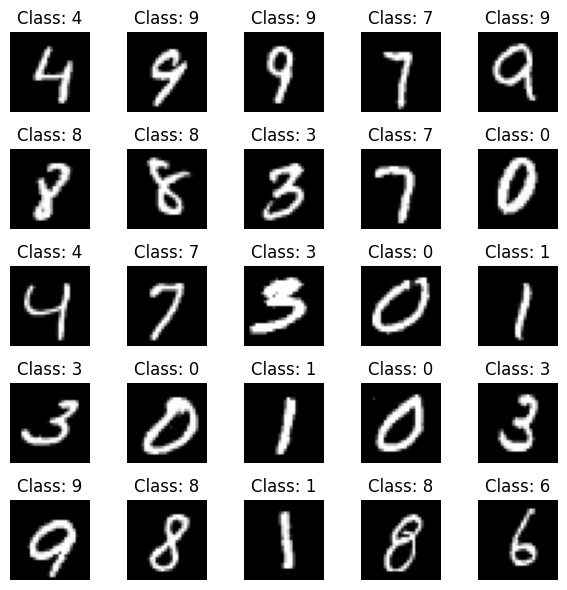

In [ ]:
fig, axes = plt.subplots(nrows=rows, ncols=digits_per_row, figsize=(6, 6))
axes = axes.flatten()

# Selecting random ids from 0 to 180000
total_digits = rows*digits_per_row
random_ids= np.random.choice(x_train_new.shape[0], total_digits, replace=False)

# Plotting the selected digits.
for i, ax in enumerate(axes):
    idx = random_ids[i]
    ax.imshow(x_train_new[idx], cmap='gray')
    ax.set_title(f'Class: {y_train_new[idx]}')
    ax.axis('off')
plt.tight_layout()
plt.show()

# Preprocessing Inputs


*   Deep Neural Networks require vectors are inputs. Since the digits are 28x28
*   One-hot Encoding is required for targets, since we use 10 classes. (e.g. 0 will be classified as 0 0 0 0 0 0 0 0 0 1, one will be classified as 0 0 0 0 0 0 0 0 1 0, etc.

grayscale images, they should be converted to vectors of 784 size.

In [5]:
x_train_new = x_train_new.reshape((180000, 784))
y_train_new = tf.one_hot(y_train_new, depth=10)
x_test_new = x_test_new.reshape((30000, 784))
y_test_new = tf.one_hot(y_test_new, depth=10)

print(
    f'Training Size - Inputs:{x_train_new.shape}, Targets:{y_train_new.shape}'
    f'\nTest Size - Inputs:{x_test_new.shape}, Targets:{y_test_new.shape}'
)

Training Size - Inputs:(180000, 784), Targets:(180000, 10)
Test Size - Inputs:(30000, 784), Targets:(30000, 10)


# Construct Deep Neural Network





*   Input: 784 Features
*   Hiddens: 2 Hiddens of 256 units, which pass through tanh activation.
*   Output: 10 probabilities (1 for each class). Softmax activation is required to convert the network's outputs into probabilities.



In [25]:
activation = 'sigmoid'
loss = 'categorical_crossentropy' # Do not change this loss function.
metrics = ['accuracy']
learning_rate = 0.008
optimizer = tf.keras.optimizers.SGD(learning_rate=learning_rate) # Do not change this optimizer.
epochs = 25

In [26]:
model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(784,), name='input'),
    tf.keras.layers.Dense(units=588, activation=activation, name='hidden-1'),
    tf.keras.layers.Dense(units=392, activation=activation, name='hidden-2'),
    tf.keras.layers.Dense(units=196, activation=activation, name='hidden-3'),
    tf.keras.layers.Dense(units=10, activation='softmax', name='outputs') # Do not change this activation function.
])
model.summary(expand_nested=True)

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 hidden-1 (Dense)            (None, 588)               461580    
                                                                 
 hidden-2 (Dense)            (None, 392)               230888    
                                                                 
 hidden-3 (Dense)            (None, 196)               77028     
                                                                 
 outputs (Dense)             (None, 10)                1970      
                                                                 
Total params: 771466 (2.94 MB)
Trainable params: 771466 (2.94 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [27]:
model.compile(optimizer=optimizer, loss=loss, metrics=metrics)
history = model.fit(
    x=x_train_new,
    y=y_train_new,
    batch_size=64,
    epochs=epochs,
    validation_data=(x_test_new, y_test_new),
    shuffle=True
    )

Epoch 1/25
2813/2813 [==============================] - 33s 11ms/step - loss: 1.8204 - accuracy: 0.5180 - val_loss: 1.1339 - val_accuracy: 0.7150
Epoch 2/25
2813/2813 [==============================] - 37s 13ms/step - loss: 0.8235 - accuracy: 0.7820 - val_loss: 0.5993 - val_accuracy: 0.8424
Epoch 3/25
2813/2813 [==============================] - 33s 12ms/step - loss: 0.5272 - accuracy: 0.8585 - val_loss: 0.4352 - val_accuracy: 0.8835
Epoch 4/25
2813/2813 [==============================] - 34s 12ms/step - loss: 0.4030 - accuracy: 0.8911 - val_loss: 0.3455 - val_accuracy: 0.9068
Epoch 5/25
2813/2813 [==============================] - 33s 12ms/step - loss: 0.3249 - accuracy: 0.9121 - val_loss: 0.2856 - val_accuracy: 0.9222
Epoch 6/25
2813/2813 [==============================] - 33s 12ms/step - loss: 0.2707 - accuracy: 0.9269 - val_loss: 0.2420 - val_accuracy: 0.9357
Epoch 7/25
2813/2813 [==============================] - 32s 12ms/step - loss: 0.2297 - accuracy: 0.9381 - val_loss: 0.2088 -

# Display Loss and Accuracy per Training Epoch

In [28]:
train_loss = history.history['loss']
val_loss = history.history['val_loss']
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

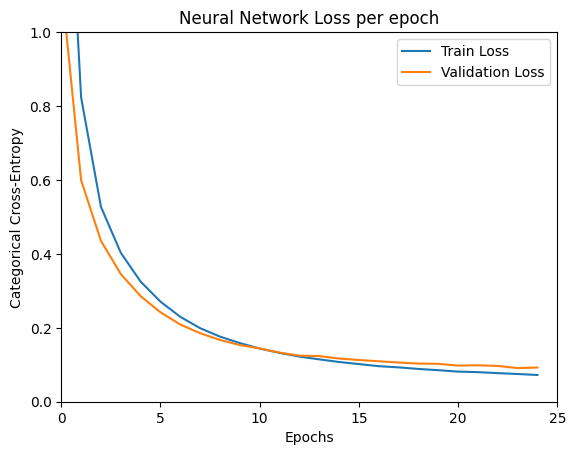

In [29]:
plt.plot(train_loss, label='Train Loss')
plt.plot(val_loss, label='Validation Loss')
plt.title('Neural Network Loss per epoch')
plt.ylabel('Categorical Cross-Entropy')
plt.xlabel('Epochs')
plt.xlim(0, epochs)
plt.ylim(0, 1)
plt.legend()
plt.show()

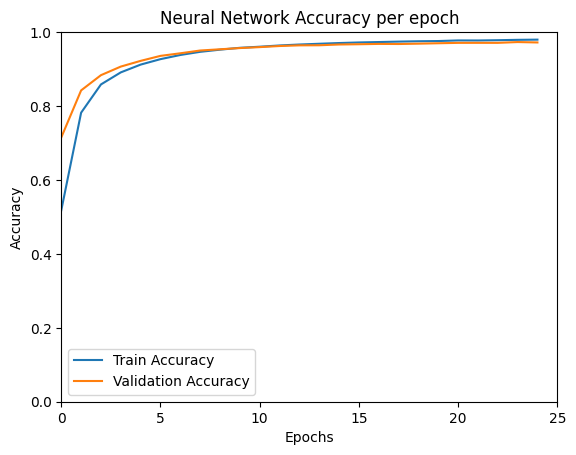

In [30]:
plt.plot(train_acc, label='Train Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.title('Neural Network Accuracy per epoch')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.xlim(0, epochs)
plt.ylim(0, 1)
plt.legend()
plt.show()

# --- TODOs ---

## 1. Hyperparameter Tuning: Try adjusting number of hidden layers, hidden units, activation function, learning rate, number of epochs, etc.


## 2. Validation: Show 1 misclassified digit from each class.

## 3. Suggest & Implement workflow improvements, aside hyperparameter tuning. Can you think of any ways to increase the overall accuracy of the Neural Network?

## 4. Upload the exercise in your GitHub repository. Google Colab can instantly deploy this notebook into a Github repository.

## 5. Write a README file in your github repository, explaining:

1. Your workflow
2. The final model architecture
3. The selected hyperparameters
4. Include the requirements.txt file, which shows the python version, as well as the library versions.

In [ ]:
!pip show tensorflow

Name: tensorflow
Version: 2.15.0
Summary: TensorFlow is an open source machine learning framework for everyone.
Home-page: https://www.tensorflow.org/
Author: Google Inc.
Author-email: packages@tensorflow.org
License: Apache 2.0
Location: /usr/local/lib/python3.10/dist-packages
Requires: absl-py, astunparse, flatbuffers, gast, google-pasta, grpcio, h5py, keras, libclang, ml-dtypes, numpy, opt-einsum, packaging, protobuf, setuptools, six, tensorboard, tensorflow-estimator, tensorflow-io-gcs-filesystem, termcolor, typing-extensions, wrapt
Required-by: dopamine_rl, tf_keras
